In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

calibration.pkl  exists.
file exists, loading
1625
(Timestamp('2018-08-03 00:00:00'), 'Reading', 'Derby County', 1, 2)
(Timestamp('2018-08-04 00:00:00'), 'Preston North End', 'Queens Park Rangers', 1, 0)
(Timestamp('2018-08-04 00:00:00'), 'Brentford', 'Rotherham United', 5, 1)
(Timestamp('2018-08-04 00:00:00'), 'Ipswich Town', 'Blackburn', 2, 2)
(Timestamp('2018-08-04 00:00:00'), 'Wigan', 'Sheffield Wednesday', 3, 2)
(Timestamp('2018-08-04 00:00:00'), 'Birmingham', 'Norwich City', 2, 2)
(Timestamp('2018-08-04 00:00:00'), 'West Bromwich Albion', 'Bolton', 1, 2)
(Timestamp('2018-08-04 00:00:00'), 'Millwall', 'Middlesbrough', 2, 2)
(Timestamp('2018-08-04 00:00:00'), 'Bristol City', 'Nottingham Forest', 1, 1)
(Timestamp('2018-08-04 00:00:00'), 'Sheffield United', 'Swansea City', 1, 2)
(Timestamp('2018-08-05 00:00:00'), 'Leeds United', 'Stoke City', 3, 1)
(Timestamp('2018-08-06 00:00:00'), 'Hull City', 'Aston Villa', 1, 3)
(Timestamp('2018-08-07 00:00:00'), 'Nottingham Forest', 'West Bromwi

(Timestamp('2018-11-03 00:00:00'), 'Brentford', 'Millwall', 2, 0)
(Timestamp('2018-11-03 00:00:00'), 'Blackburn', 'Queens Park Rangers', 1, 0)
(Timestamp('2018-11-03 00:00:00'), 'Derby County', 'Birmingham', 3, 1)
(Timestamp('2018-11-03 00:00:00'), 'Hull City', 'West Bromwich Albion', 1, 0)
(Timestamp('2018-11-03 00:00:00'), 'Nottingham Forest', 'Sheffield United', 1, 0)
(Timestamp('2018-11-03 00:00:00'), 'Ipswich Town', 'Preston North End', 1, 1)
(Timestamp('2018-11-03 00:00:00'), 'Rotherham United', 'Swansea City', 2, 1)
(Timestamp('2018-11-03 00:00:00'), 'Stoke City', 'Middlesbrough', 0, 0)
(Timestamp('2018-11-04 00:00:00'), 'Wigan', 'Leeds United', 1, 2)
(Timestamp('2018-11-09 00:00:00'), 'Sheffield United', 'Sheffield Wednesday', 0, 0)
(Timestamp('2018-11-10 00:00:00'), 'Norwich City', 'Millwall', 4, 3)
(Timestamp('2018-11-10 00:00:00'), 'Derby County', 'Aston Villa', 0, 3)
(Timestamp('2018-11-10 00:00:00'), 'Middlesbrough', 'Wigan', 2, 0)
(Timestamp('2018-11-10 00:00:00'), 'Readi

,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17254,2019-01-12,BPL,West Ham United,Arsenal,1,0,0.82,0.85,1.50,1.07
17280,2019-01-12,BPL,Burnley,Fulham,2,1,0.87,1.07,0.98,0.89
17284,2019-01-12,BPL,Brighton and Hove Albion,Liverpool,0,1,0.44,2.46,0.63,2.38
17285,2019-01-12,BPL,Crystal Palace,Watford,1,2,1.11,1.75,1.83,1.13
17287,2019-01-12,BPL,Cardiff City,Huddersfield Town,0,0,0.16,0.47,0.65,1.58
17294,2019-01-12,BPL,Leicester City,Southampton,1,2,1.59,1.26,2.29,0.86
17308,2019-01-12,BPL,Chelsea,Newcastle,2,1,1.40,0.46,1.27,0.99
17328,2019-01-13,BPL,Everton,AFC Bournemouth,2,0,1.68,1.81,1.86,1.82
17335,2019-01-13,BPL,Tottenham Hotspur,Manchester United,0,1,2.14,0.90,3.04,0.63
17351,2019-01-14,BPL,Manchester City,Wolverhampton,3,0,2.74,0.08,4.20,0.21


In [17]:
print(calibrator.raw_data['League'].unique())
calibrator.raw_data.loc[calibrator.raw_data['League']=='ELC'];

['FL1' 'BPL' 'SPD' 'ISA' 'GB' 'UCL' 'MPDTC' 'MLS' 'SA' 'NT' 'NWSL' 'BSA'
 'RPL' 'MPDTA' 'ATB' 'SRSL' 'FL2' 'G2B' 'ELC' 'SP' 'PL' 'DE' 'TTSL' 'SSD'
 'ISB' 'APD' 'UEL' 'USL' 'DS' 'BJL' 'CSL' 'JJL' 'ELO' 'SAAPL' 'ELT' 'GSL'
 'AA']


In [4]:
Teams=dict()
League=dict()

In [5]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,29.9,21,38,5,1,42.53,69.94,5.22,0.33,4.33,3.4974
SPD,0,29.5,21,38,6,1,36.81,66.37,4.43,0.27,5.37,3.2339
BPL,0,22.5,14,31,8,2,4.70,15.34,3.38,0.33,37.12,2.2646
ELC,0,22.5,14,31,9,1,5.91,16.73,5.00,0.50,38.03,2.5000
ISA,0,21.8,14,30,9,2,4.09,12.24,2.98,0.30,41.98,2.0860
PL,0,20.9,13,30,9,2,3.25,10.16,3.45,0.38,49.89,2.1390
DE,0,18.3,10,27,9,3,1.33,4.16,4.06,0.52,69.28,1.9488
RPL,0,17.9,10,26,9,3,0.96,3.33,3.29,0.44,72.64,1.8424
FL1,0,16.4,8,25,9,4,0.42,1.73,3.54,0.51,81.36,1.7346


In [73]:
country='BPL'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
# home_advantage=np.array([0,1])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]= calibrator.get_teams_for_league(country)
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2)
League[country].process_current_results(calibrator.get_current_results(country))
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[0.21350851 0.94804168]
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,57,97.0,90,103,2,1,80.47,99.73,5.44,0.13,0.00
Manchester City,53,91.8,85,98,2,1,19.40,96.28,6.72,0.25,0.00
Tottenham Hotspur,48,80.1,72,88,5,3,0.12,3.10,5.08,0.30,0.00
Chelsea,47,76.8,69,85,5,3,0.01,0.87,4.18,0.26,0.00
Manchester United,41,69.6,62,78,6,4,0.00,0.02,5.13,0.41,0.00
Arsenal,41,68.2,60,76,6,4,0.00,0.01,5.02,0.46,0.00
Watford,32,53.2,45,61,13,7,0.00,0.00,3.63,0.45,0.00
Everton,30,52.3,44,61,13,7,0.00,0.00,3.54,0.41,0.00
Leicester City,31,51.8,44,60,13,7,0.00,0.00,2.69,0.34,0.00
West Ham United,31,51.7,44,60,13,7,0.00,0.00,3.21,0.42,0.00


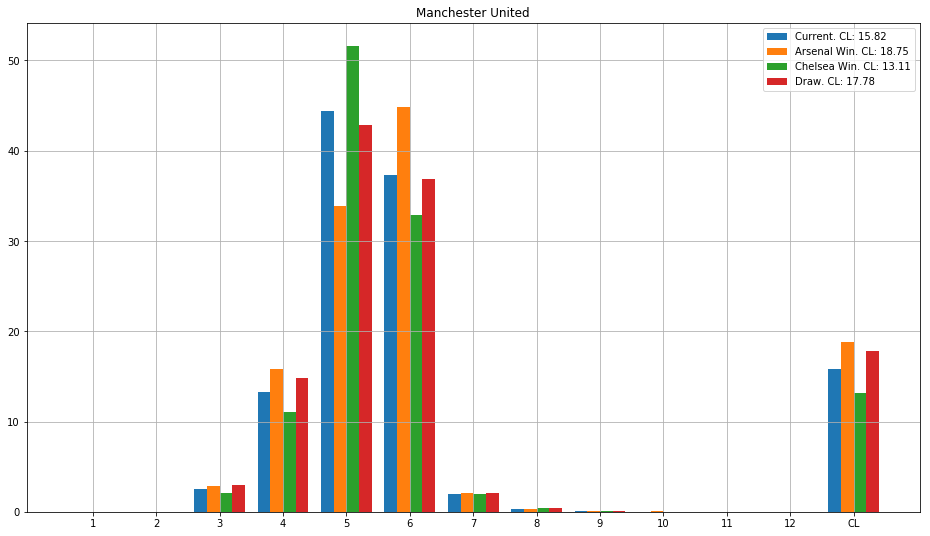

In [8]:
PremierLeague=League['BPL']
_,fig=PremierLeague.what_if('Arsenal v Chelsea',ref_team='Manchester United')

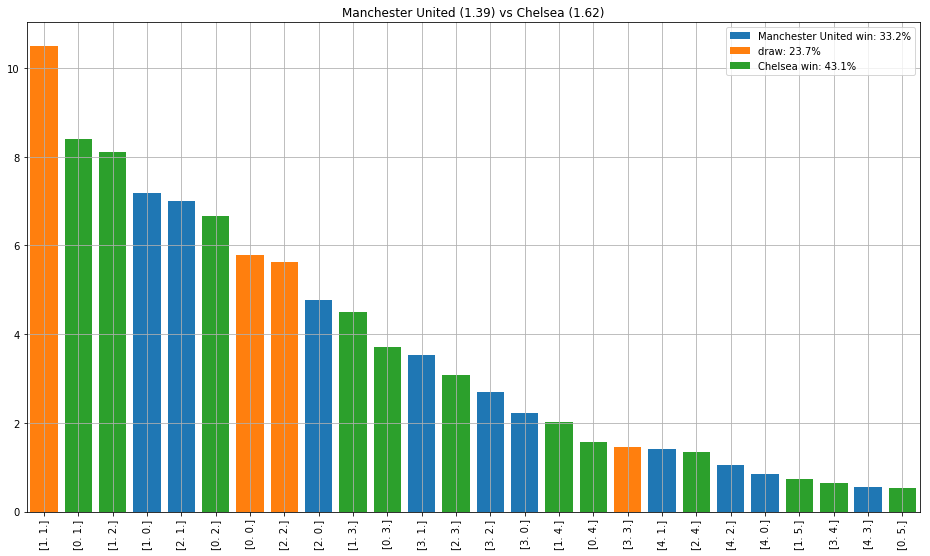

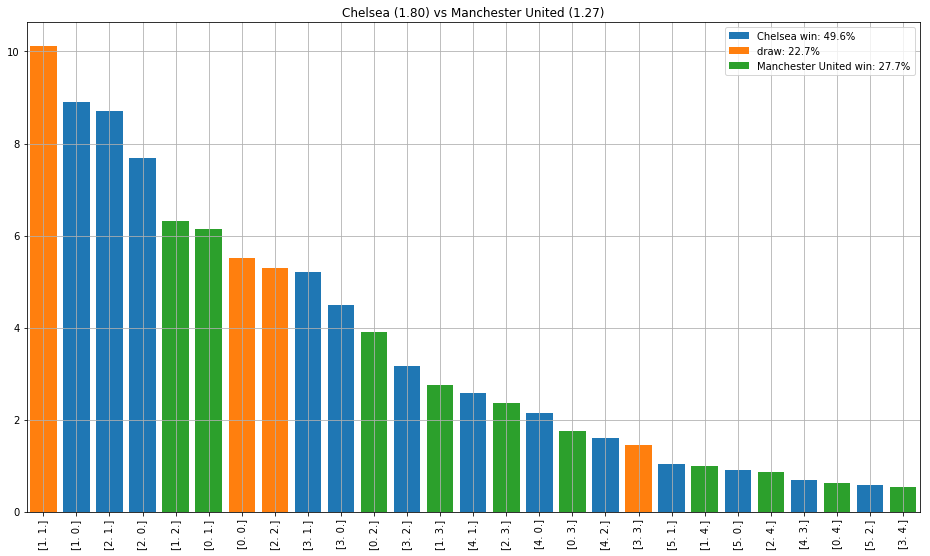

In [12]:
team1=teams['Manchester United']
team2=teams['Brighton and Hove Albion']
team2=teams['Chelsea']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

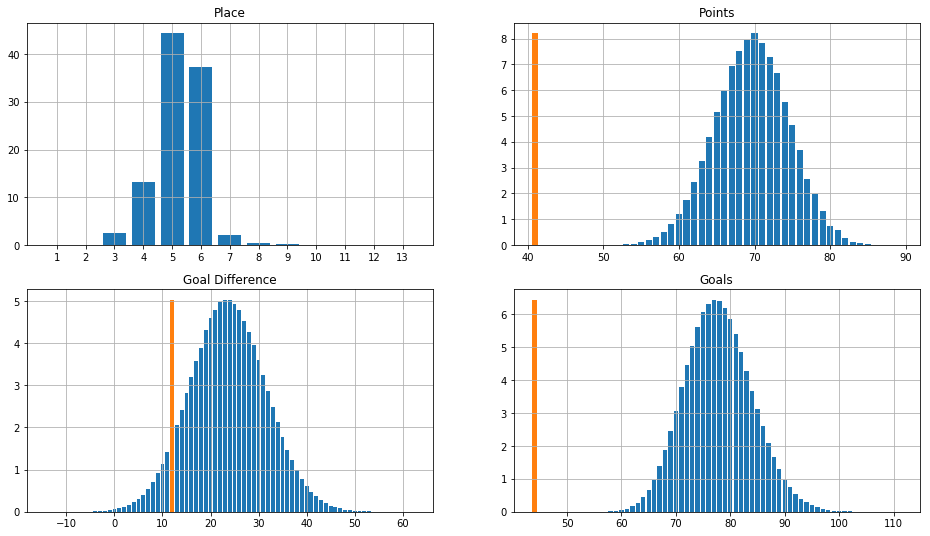

In [9]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

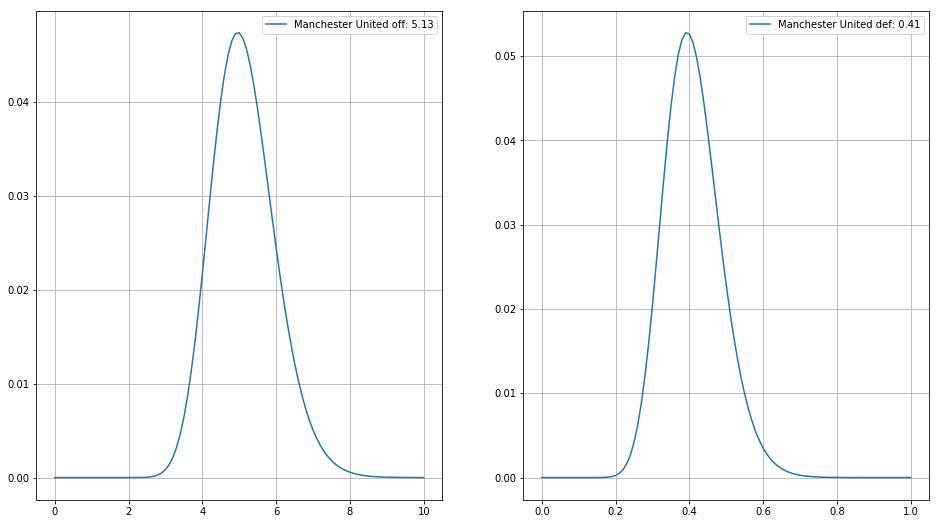

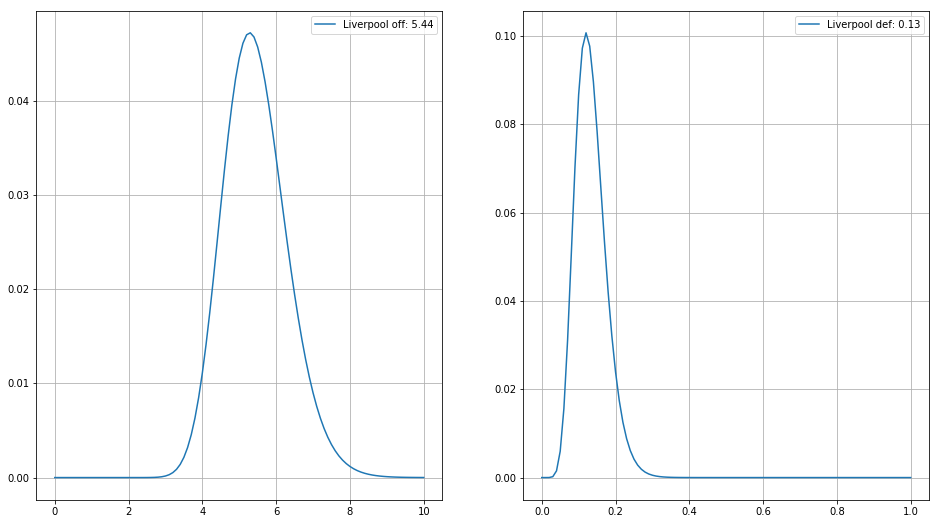

In [10]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

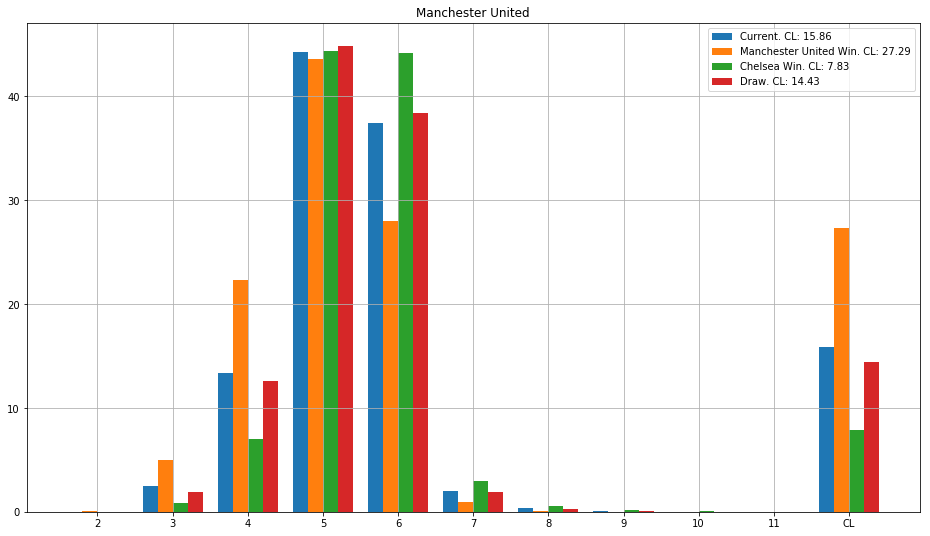

In [75]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl,_=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
_,fig=PremierLeague.what_if(the_match,ref_team=ref_team)

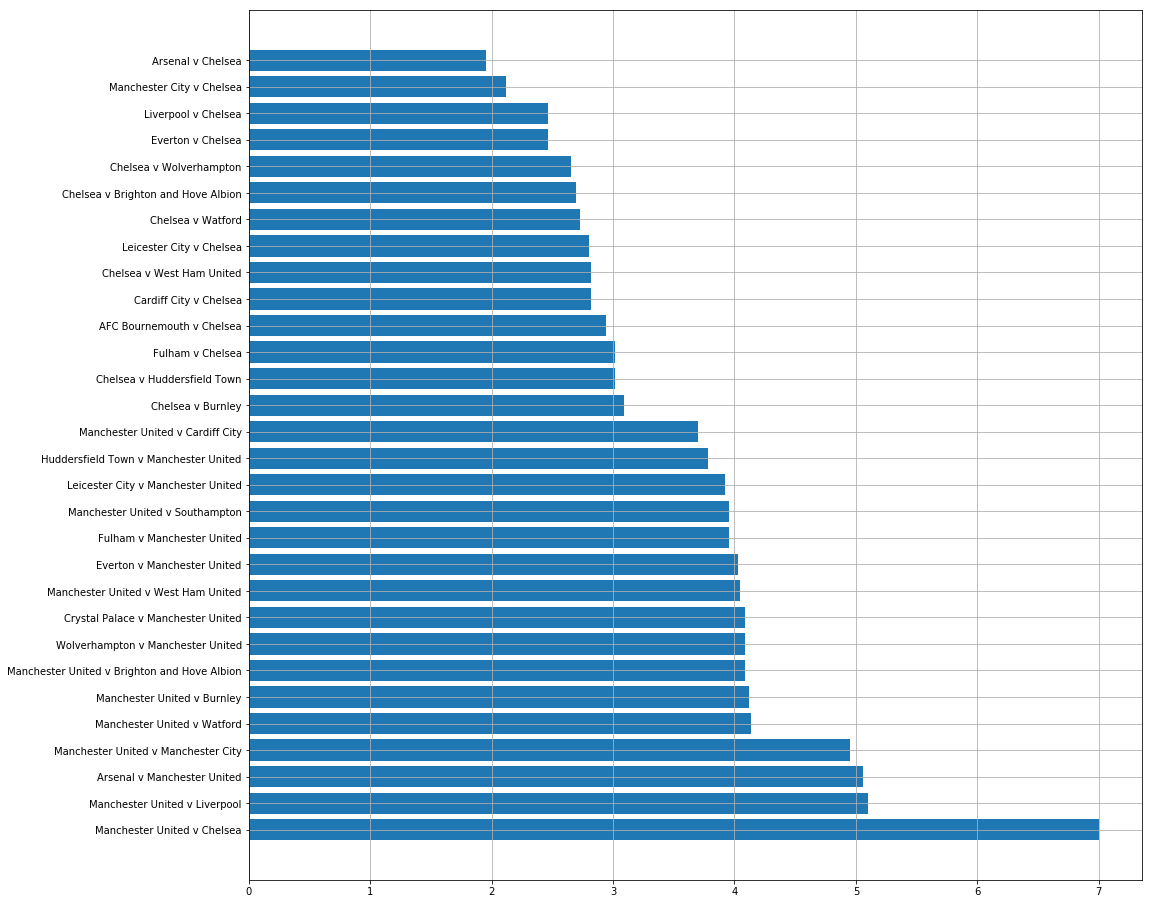

In [76]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(30)
plt.barh(xx,imp[xx])
plt.yticks(xx,matches[xx],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.788089375

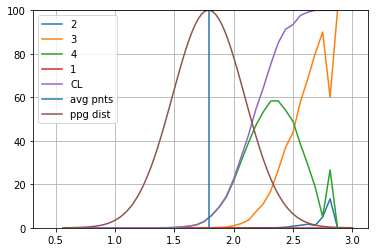

In [77]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
mu=pnts.mean()/n
plt.axvline(mu,label='avg pnts')
s=(pnts/n).std()
from scipy.stats import norm
x=np.linspace(mu-4*s,mu+4*s,100)
y=norm.pdf((x-mu)/s)
y=100*y/y.max()
plt.plot(x,y,label='ppg dist')
plt.legend()
pnts.mean()/n